In [49]:
import fitz  # this is pymupdf
import os
import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [66]:
text = ""
my_path = '../biblio/TCD/files'
for ind, path in enumerate(os.listdir(os.path.join(my_path))):
    arquivo = os.listdir(os.path.join(my_path, path))[0]
    print(ind, arquivo)
    with fitz.open(os.path.join(my_path, path, arquivo)) as doc:
        for page in doc:
            text += page.getText()


0 9. SBRAGIA, et al (2021) - The role of stakeholder management on project results (EN).pdf
1 10. ESKEROD_VAAGAASAR_2014 (PMJ) Stakeholder management strategies and practices during a project course.pdf
2 Shenhar et al. - 1997 - Mapping the Dimensions of Project Success..pdf
3 Anbari et al. - 2008 - PERSPECTIVES ON RESEARCH IN PROJECT MANAGEMENT..pdf
4 Silvius - 2017 - Sustainability as a new school of thought in proje.pdf
5 Gilbert Silvius et al. - 2017 - Considering sustainability in project management d.pdf
6 Turner et al. - 2013 - Perspectives on research in project management th.pdf
7 Vos e Achterkamp - 2006 - Stakeholder identification in innovation projects.pdf
8 El-Gohary et al. - 2006 - Stakeholder management for public private partners.pdf
9 Achterkamp e Vos - 2008 - Investigating the use of the stakeholder notion in.pdf
10 Shaukat et al. - 2021 - Revisiting the relationship between sustainable pr.pdf
11 Elias et al. - 2002 - Stakeholder analysis for R&D project management.pd

In [51]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['et al', 'project', 'management', 'et', 'al', 'success', 'projects', 'stakeholder',
                  'research', 'article', 'journal', 'stakeholders', 'sustainability', 
                   'manager', 'organization', 'international', 'managers', 'stake','holder',
                   'sustainable', 'development', 'also', 'factor', 'could', 'however',
                  'factors', 'paper'])
wc = WordCloud(stopwords=stop_words, min_word_length=3).generate(text.lower())

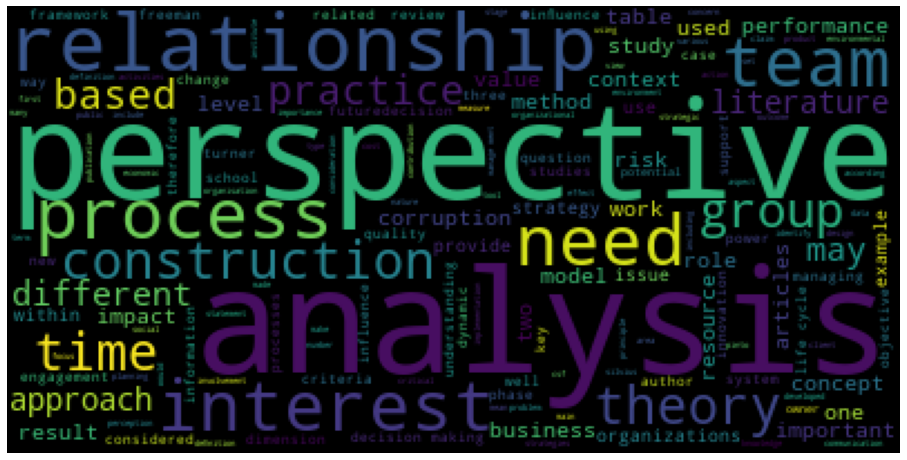

In [52]:
plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [55]:
# !pip install spacy
import spacy
# nlp = spacy.load('en_core_web_sm')
# nlp.max_length = 1705778
# doc = nlp(text.lower())

In [56]:
import pickle
with open('nlp.pickle', 'wb') as out:
    pickle.dump(nlp, out)
with open('doc.pickle', 'wb') as out:
    pickle.dump(doc, out)


In [74]:
with open('nlp.pickle', 'rb') as in_:
    nlp = pickle.load(in_)
with open('doc.pickle', 'rb') as in_:
    doc = pickle.load(in_)


In [75]:
from collections import defaultdict
text_pos_ = defaultdict(list)
text_lemma = []
for token in doc:
    # print(token.text, token.pos_)
    if len(token.text) < 3 or token.text in stop_words:
        continue
    if token.pos_ == 'ADJ':
        text_pos_['ADJ'].append(token.text)
    elif token.pos_ == 'VERB':
        text_pos_['VERB'].append(token.text)
    else:
        text_pos_['OTHER'].append(token.text)
    text_lemma.append(token.lemma_)
    


In [76]:
def plot_wc(wc):
    plt.figure(figsize=(16,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

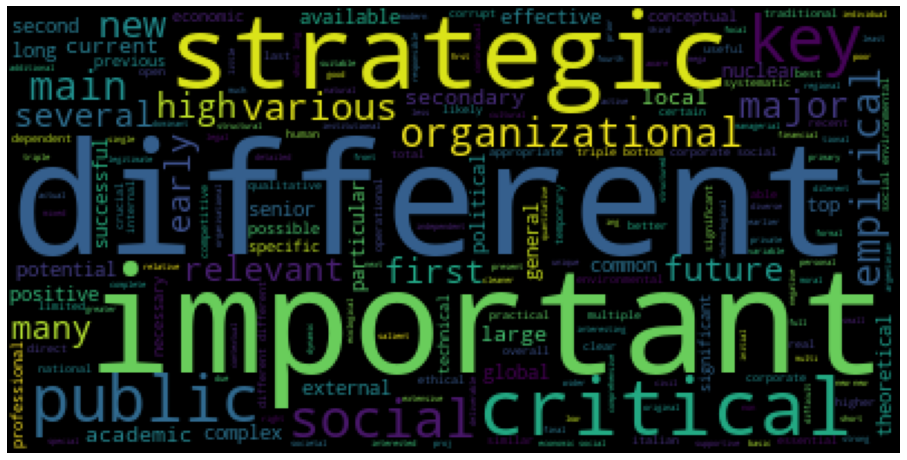

Árvore de adjetivos


In [77]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['ADJ'])))
print('Árvore de adjetivos')

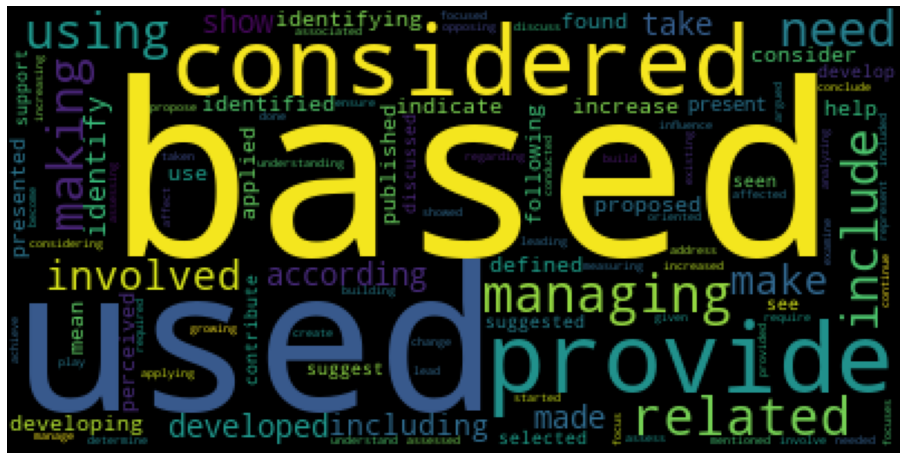

Árvore de verbos


In [78]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['VERB'])))
print('Árvore de verbos')

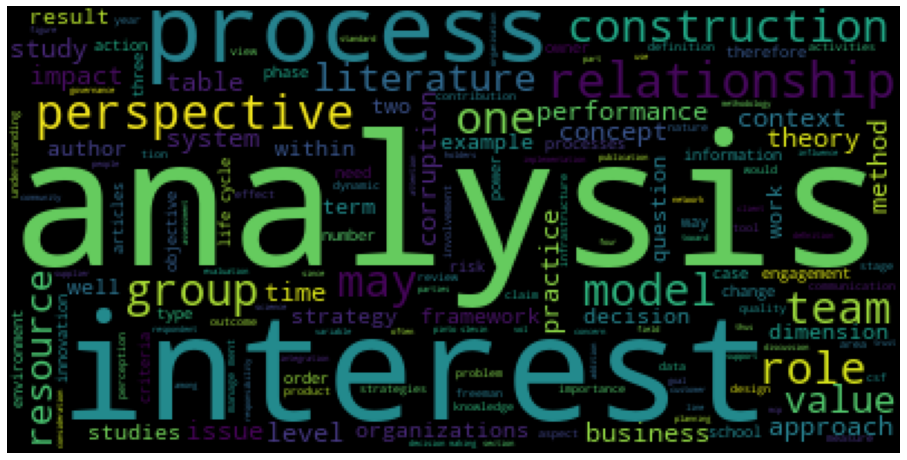

Árvore de outras palavras


In [79]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['OTHER'])))
print('Árvore de outras palavras')

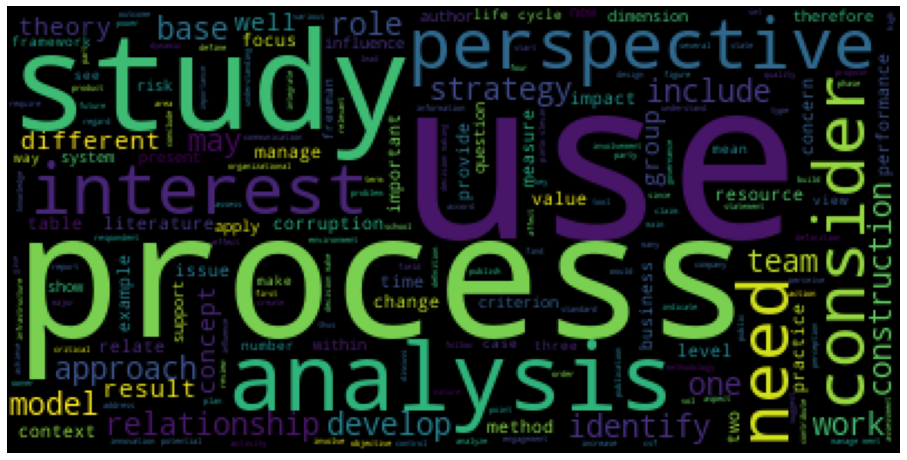

Árvore de palavras lematizadas


In [80]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_lemma)))
print('Árvore de palavras lematizadas')

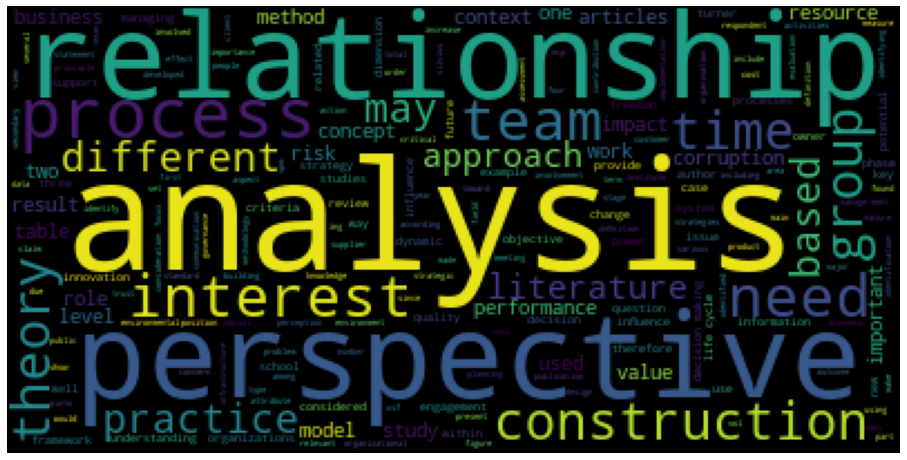

Árvore de palavras originais


In [81]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(text.lower()))
print('Árvore de palavras originais')

In [82]:
from collections import Counter

freq = Counter(text_lemma)

In [83]:
import matplotlib.pyplot as plt

In [86]:
count = freq.most_common(100)
words = []
counts = []
for item in count:
    words.append(item[0])
    counts.append(item[1])

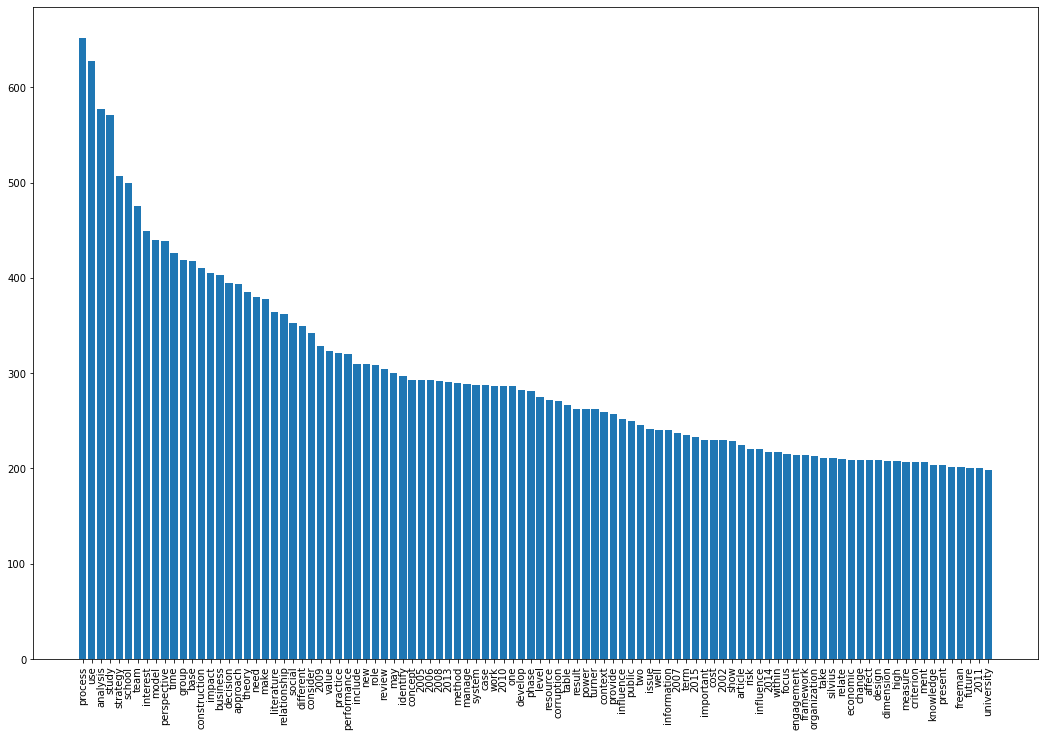

In [94]:
plt.figure(figsize=(18, 12))
plt.xticks(rotation=90)
plt.bar(words, counts)
plt.show()

In [88]:
count

[('process', 652),
 ('use', 627),
 ('analysis', 577),
 ('study', 571),
 ('strategy', 507),
 ('school', 499),
 ('team', 475),
 ('interest', 449),
 ('model', 440),
 ('perspective', 439),
 ('time', 426),
 ('group', 419),
 ('base', 418),
 ('construction', 410),
 ('impact', 405),
 ('business', 403),
 ('decision', 395),
 ('approach', 394),
 ('theory', 385),
 ('need', 380),
 ('make', 378),
 ('literature', 364),
 ('relationship', 362),
 ('social', 353),
 ('different', 349),
 ('consider', 342),
 ('2009', 328),
 ('value', 323),
 ('practice', 321),
 ('performance', 320),
 ('include', 310),
 ('new', 310),
 ('role', 308),
 ('review', 304),
 ('may', 300),
 ('identify', 297),
 ('concept', 293),
 ('2005', 293),
 ('2006', 293),
 ('2008', 292),
 ('2013', 291),
 ('method', 290),
 ('manage', 289),
 ('system', 288),
 ('case', 287),
 ('work', 286),
 ('2010', 286),
 ('one', 286),
 ('develop', 282),
 ('phase', 281),
 ('level', 275),
 ('resource', 272),
 ('corruption', 271),
 ('table', 267),
 ('result', 262),


In [95]:
len(freq)

14005

In [96]:
sum(counts)

29921

In [100]:
sum([item[1] for item in freq.most_common()[101:]])

101645

In [101]:
29921 / 100

299.21

In [102]:
101645 / (14005 - 100)

7.309960445882776